# IMPORTING MODULES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df = pd.read_csv('P39-Fashion-MNIST-Datasets/fashion-mnist_train.csv', sep = ',')

In [4]:
fashion_test_df = pd.read_csv('P39-Fashion-MNIST-Datasets/fashion-mnist_test.csv', sep = ',')

# DATA VISUALIZATION

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape

(10000, 785)

In [11]:
training = np.array(fashion_train_df, dtype = 'float32')

In [12]:
testing = np.array(fashion_test_df, dtype = 'float32')

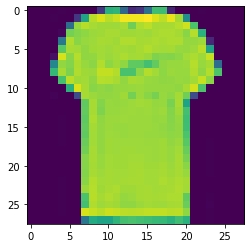

In [13]:
plt.imshow(training[10,1:].reshape(28,28))

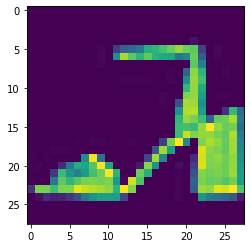

In [14]:
plt.imshow(training[60,1:].reshape(28,28))

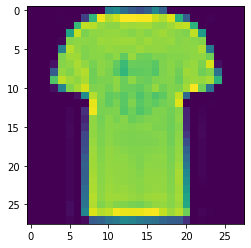

In [15]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]

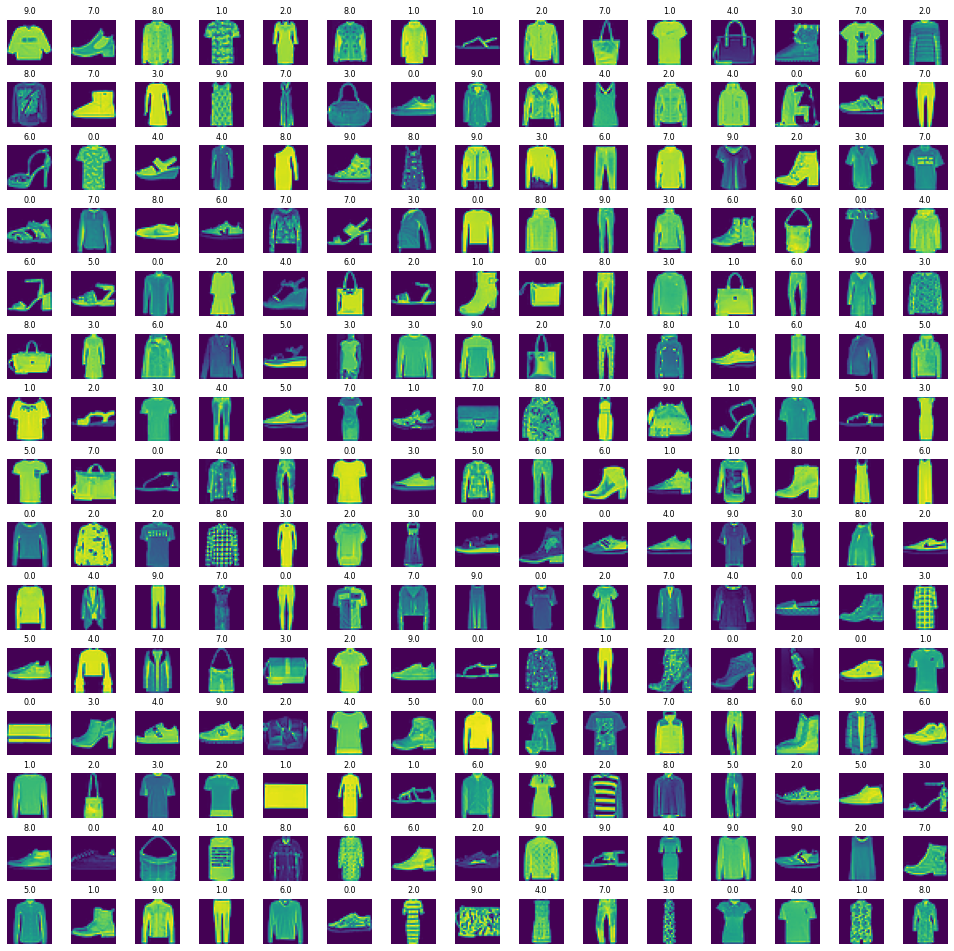

In [16]:
# Dimensions
W_grid = 15
L_grid = 15

#subplots of dimensions of our grids
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flatten the 15x15 matrix to 255 array

n_training = len(training) # get length of training dataset

#select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[i, 1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# MODEL TRAINING

In [17]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [18]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [21]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [22]:
X_train.shape

(48000, 28, 28, 1)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_validate.shape

(12000, 28, 28, 1)

In [25]:
import keras

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()

In [29]:
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

In [30]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [32]:
cnn_model.add(Flatten())

In [35]:
cnn_model.add(Dense(32, activation = 'relu'))

In [36]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [37]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
epochs = 50

In [41]:
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 6s 51ms/step - loss: 1.2818 - accuracy: 0.5907 - val_loss: 0.7477 - val_accuracy: 0.7253
Epoch 2/50
94/94 [==============================] - 4s 38ms/step - loss: 0.6515 - accuracy: 0.7639 - val_loss: 0.5932 - val_accuracy: 0.7857
Epoch 3/50
94/94 [==============================] - 4s 39ms/step - loss: 0.5587 - accuracy: 0.7978 - val_loss: 0.5326 - val_accuracy: 0.8111
Epoch 4/50
94/94 [==============================] - 4s 38ms/step - loss: 0.5090 - accuracy: 0.8160 - val_loss: 0.4962 - val_accuracy: 0.8205
Epoch 5/50
94/94 [==============================] - 4s 39ms/step - loss: 0.4815 - accuracy: 0.8256 - val_loss: 0.4769 - val_accuracy: 0.8307
Epoch 6/50
94/94 [==============================] - 3s 36ms/step - loss: 0.4598 - accuracy: 0.8342 - val_loss: 0.4602 - val_accuracy: 0.8374
Epoch 7/50
94/94 [==============================] - 3s 36ms/step - loss: 0.4430 - accuracy: 0.8392 - val_loss: 0.4405 - val_accuracy: 0.8422
Epoch 8/50
94

# MODEL EVALUATION

In [42]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8763
Test Accuracy : 0.876


In [52]:
predicted_classes = cnn_model.predict(X_test) 
classes_x=np.argmax(predicted_classes,axis=1)

313/313 [==============================] - 1s 4ms/step


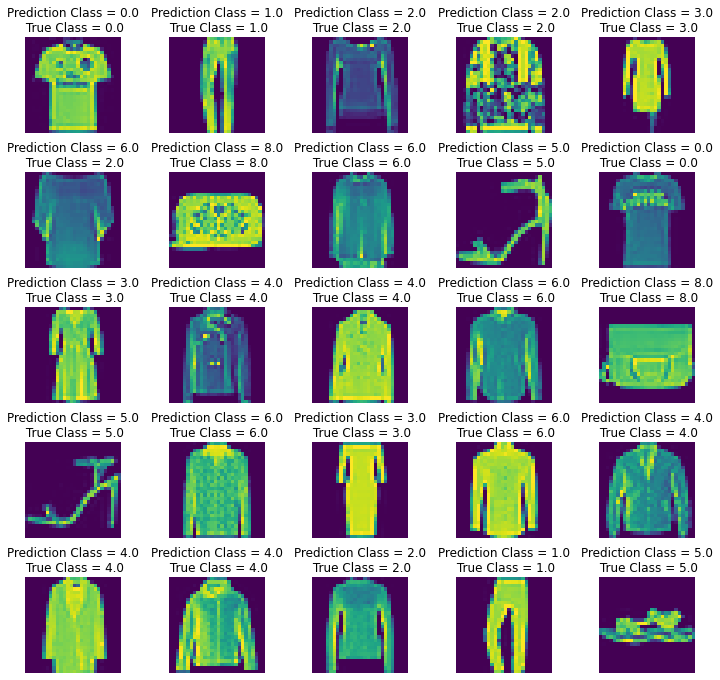

In [55]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(classes_x[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

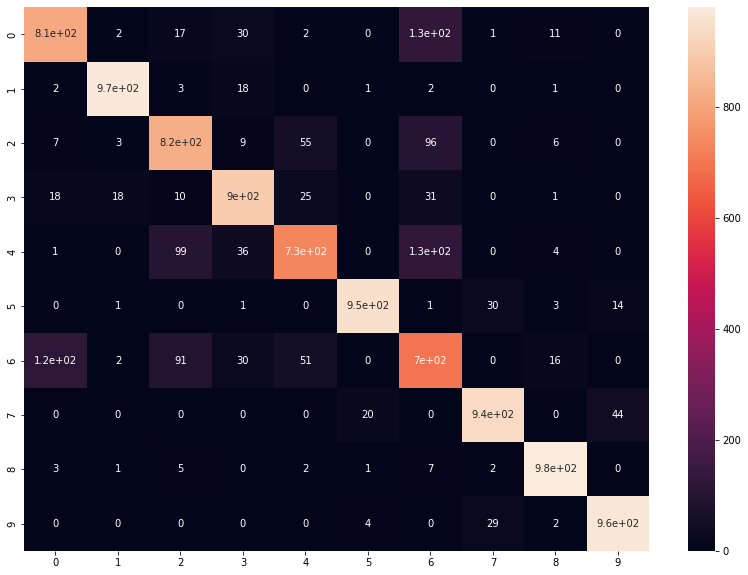

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [57]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, classes_x, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.81      0.83      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.79      0.82      0.80      1000
     Class 3       0.88      0.90      0.89      1000
     Class 4       0.84      0.73      0.79      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.64      0.69      0.67      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

